In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys




In [17]:
delta = 0.0
alpha = -2.0
beta = 1.0

def deriv2(x, y):
    return -delta*y[1] - alpha*y[0] - beta*y[0]**3

def phi(x, y):
    return 0.5*alpha*y[0]**2 + 0.25*beta*y[0]**4

def energy(x, y):
    return 0.5*y[1]**2 + phi(x, y)

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

In [20]:
def kick_drift_step(func, x, y, dx):
    
    s = 4
    p = 2**(1/3)
    q = 1 - p
    r = 4 - 2*p
    
    c = [1/r, q/r, q/r, 1/r]
    d = [0, 2/r, -2*p/r, 2/r]
    
#     a = f(x, y)[1]
    v = y[1]
    y = y[0]
    
    for i in range(len(c)):

        v += d[i]*dx*func(x, y)[1] 
        y += c[i]*v*dx
        
    y = np.array([y, v])
    x += dx
    
    return x, y

In [23]:
xplots = []
yplots = []
vplots = []
eplots = []

xmax = 20
dx = 0.01
x = 0.0
y0 = 1
v0 = 1.5
y = np.array([y0, v0])
e_initial = energy(x, y)

xplot = [x]
yplot = [y[0]]
vplot = [y[1]]
eplot = [0]

while x < xmax - dx/2:
    yp = y[0]
    vp = y[1]
    
    if x == 0: yp = y0 + 1
    
    x, y = kick_drift_step(f, x, y, dx)
    #x, y = euler_step(f, x, y, dx)

    xplot.append(x)
    yplot.append(y[0])
    vplot.append(y[1])
    eplot.append(energy(x, y) - e_initial)
    
    #print(x, y)
#     if yp <= y0 and y[0] > y0:
#         break
        
        
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Question 1a') 
plt.subplots_adjust(wspace=.25)

# vint = vp + (y[1]-vp)*(y[0]-y0)/(y[0]-yp)
# print('vint =', vint, 'err =', abs((vint-v0)/v0))


ax[0].plot(xplot, yplot, 'k')
ax[0].set(xlabel = 'x', ylabel = 'y', title = 'Phase Portrait')

ax[1].plot(xplot, eplot, 'k')
ax[1].set(xlabel = 'x', ylabel = 'Energy error', title = 'Energy Error Plot')

plt.savefig('Question1b1_graph.jpg')




[1.5 1. ]


IndexError: invalid index to scalar variable.

In [24]:
xmax = 20
dx = 0.01
x = 0.0
y0 = 1
v0 = 1.5
y = np.array([y0, v0])
e_initial = energy(x, y)

eplot = []
dxplot = []

for n in range(1, 14):
    x = 0.0
    y0 = 1
    v0 = 1.5
    y = np.array([y0, v0])
    e_initial = energy(x, y)
    dx = 2**(-n)
   
    while x < xmax - dx/2:
        yp = y[0]
        vp = y[1]

        if x == 0: yp = y0 + 1

        x, y = kick_drift_step(f, x, y, dx)
        #x, y = euler_step(f, x, y, dx)

        
    eplot.append(abs(energy(x, y) - e_initial))
    dxplot.append(dx)
    
plt.loglog(dxplot, eplot, 'k')
plt.xlabel('log(dx)')
plt.ylabel('log(abs(error))')
plt.title('Question 1c')
plt.savefig('Question1c_graph.jpg')


IndexError: invalid index to scalar variable.

In [211]:
xmax = 5
dx = 0.001
x = 0.0
y0 = 1
v0 = 1.5
y = np.array([y0, v0])

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

while x < xmax:
    xp = x
    yp = y[0]
    vp = y[1]

    if x == 0: yp = y0 + 1
        
    x, y = kick_drift_step(f, x, y, dx)
#     print(x, y)
    #x, y = euler_step(f, x, y, dx)

while x > 0:
    
    xp = x
    yp = y[0]
    vp = y[1]

    x, y = kick_drift_step(f, x, y, -dx)

#     print(x,y)
    #x, y = reverse_euler_step(f, x, y, dx)

ynew = interp(xp, yp, x, y[0], x = 0)
vnew = interp(xp, vp, x, y[1], x = 0)

    

print('x = {}, y = {}, v = {}'.format(xp, ynew, vnew))




TypeError: kick_drift_step() missing 2 required positional arguments: 'eps2' and 'dt'

Question 2:


t = 99.9999999999986 dE = 5.379681734807296e-10


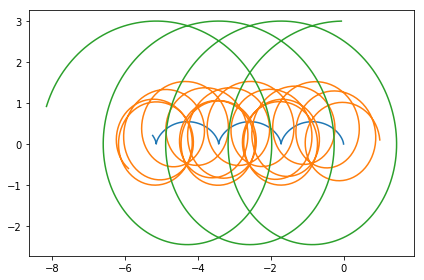

In [203]:
tiny = 1.e-20

# def initialize(n, seed, v0):
#     mass = np.ones(n)/n
#     if n == 2:
#         pos = np.array([[1.0,0,0],[-1.0,0,0]])
#         vel = np.array([[0,v0,0],[0,-v0,0]])
        
#     else:
#         pos = np.zeros((n,3))
#         vel = np.zeros((n,3))
        
#     return mass,pos,vel

def initialize_hw(rj, mj): #sun, earth, jupiter
    mass = np.array([1, 3e-6, mj])
    pos = np.array([[0,0,0], [1,0,0], [0,rj,0]])
    
    ve = np.sqrt((mass[0] + mass[1])/1)
    vj = np.sqrt((mass[0] + mass[2])/rj)
    
    vel = np.array([[0,0,0], [0,ve,0], [-vj,0,0]])
    
    return mass,pos,vel


def initialize(n, seed, v0):
    mass = np.ones(n)/n
    pos = np.zeros((n,3))
    vel = np.zeros((n,3))
    if n == 2:
        pos = np.array([[1.0,0,0],[-1.0,0,0]])
        vel = np.array([[0,v0,0],[0,-v0,0]])
    return mass,pos,vel

def potential_energy(mass, pos, eps2):
    n = len(mass)
    pot = 0.0
    dx = np.zeros((n,3))
    for i in range(n):
        dx[i+1:] = pos[i+1:] - pos[i]
        dr2 = (dx[i+1:]**2).sum(axis=1) + eps2
        pot -= mass[i]*(mass[i+1:]/np.sqrt(dr2)).sum()
    return pot

def alt_potential_energy(mass, pos, eps2):
    n = len(mass)
    pot = 0.0
    for i in range(n):
        for j in range(i+1,n):
            dr2 = eps2
            for k in range(3):
                dr2 += (pos[i,k]-pos[j,k])**2
            pot -= mass[i]*mass[j]/math.sqrt(dr2)
    return pot

def kinetic_energy(mass, vel):
    return 0.5*(mass*(vel**2).sum(axis=1)).sum()

def alt_kinetic_energy(mass, vel):
    n = len(mass)
    kin = 0.0
    for i in range(n):
        vi2 = 0.0
        for k in range(3):
            vi2 += vel[i,k]**2
        kin += 0.5*mass[i]*vi2
    return kin

def energy(mass, pos, vel, eps2):
    T = kinetic_energy(mass, vel)
    U = potential_energy(mass, pos, eps2)
    return T+U

def output(t, E0, mass, pos, vel, eps2):
    E = energy(mass, pos, vel, eps2)
    print('t =', t, 'dE =', E-E0)

def acceleration(mass, pos, eps2):
    n = len(mass)
    acc = np.zeros((n,3))
    for i in range(n):
        dx   = pos - pos[i]
        dr2  = (dx**2.0).sum(axis=1) + eps2
        dr2i = 1./dr2
        dr3i = mass*np.sqrt(dr2i)*dr2i
        dx  *= dr3i.reshape(n,1)
        acc[i] = dx.sum(axis=0)
    return acc*1.0

def alt_acceleration(mass, pos, eps2):
    n = len(mass)
    acc = np.zeros((n,3))
    for i in range(n):
        for j in range(i+1,n):
            dr2 = eps2
            for k in range(3):
                dr2 += (pos[j,k]-pos[i,k])**2
            dr2i = 1./dr2
            dr3i = dr2i*math.sqrt(dr2i)
            for k in range(3):
                dxij = (pos[j,k]-pos[i,k])*dr3i
                acc[i,k] += mass[j]*dxij
                acc[j,k] -= mass[i]*dxij
    return acc

def step(t, mass, pos, vel, eps2, dt):

    # Second-order predictor-corrector.

    acc = acceleration(mass, pos, eps2)
    pos += dt*(vel+0.5*dt*acc)
    anew = acceleration(mass, pos, eps2)
    vel += 0.5*dt*(acc+anew)

    return t+dt,pos,vel

def kdk_step(t, mass, pos, vel, eps2, dt):
    vel += 0.5*acceleration(mass, pos, eps2)*dt
    pos += vel*dt
    vel += 0.5*acceleration(mass, pos, eps2)*dt
    t += dt
    return t, pos, vel

def orbital_elements(m1, m2, x1, x2, v1, v2, eps2):
    M = m1+m2
    x = x2-x1
    v = v2-v1
    r2 = (x**2).sum() + eps2
    v2 = (v**2).sum()
    E = 0.5*v2 - M/math.sqrt(r2)
    sma = -0.5*M/E
    h2 = ((np.cross(x,v))**2).sum()
    ecc = (1 + 2*E*h2/M**2)**0.5
        
    return sma, ecc, E, h2**0.5
    
tiny = 1.e-20
def main(N, seed, eps, dt, t_end, v0):
    if eps <= 0.0: eps = tiny

    # Initial conditions.

    t = 0.0
#     mass,pos,vel = initialize(N, seed, v0)
    
    Mj = 0.1
    Rj = 3.0
    
    mass,pos,vel = initialize_hw(Rj, Mj)

    # Initial diagnostics.
    
    E0 = energy(mass, pos, vel, eps**2)
#     print('Initial E =', E0)
#     output(t, E0, mass, pos, vel, eps**2)
    a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
                                  vel[0], vel[1], eps**2)
#     print('semimajor axis =', a, ' eccentricity =', e)

    # Run forward to specified time.

    tplot = []
    dEplot = []
    hplot = []
    smaplot = []
    eccplot = []
    
    x1plot = []
    y1plot = []
    
    x2plot = []
    y2plot = []
    
    x3plot = []
    y3plot = []
    
    emax = 0

    rp = 1.e6
    rpp = rp+1.
    posp = np.zeros(3)
    pospp = np.ones(3)
    while t < t_end-0.5*dt:
        t,pos,vel = step(t, mass, pos, vel, eps**2, dt)
        E = energy(mass, pos, vel, eps**2)
        a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0],
                                      pos[1], vel[0], vel[1], eps**2)
        r = (((pos[0]-pos[1])**2).sum())**0.5
        
        if e > emax:
            emax = e
        
#         if r < rp and rp >= rpp:
#             v1 = (rp-rpp)/dt
#             v2 = (r-rp)/dt
#             tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
#             xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
#             print('maximum:  t =', tmax,
#                   'r =', (xmax**2).sum()**0.5,
#                   'angle =', math.atan2(xmax[1], xmax[0]) )
            
        if a < 0:
            print('unbound orbit')
            break

        tplot.append(t)
        dEplot.append(E-E0)
        hplot.append(h)
        smaplot.append(a)
        eccplot.append(e)
        
        x1plot.append(pos[0][0])
        y1plot.append(pos[0][1])
        
        x2plot.append(pos[1][0])
        y2plot.append(pos[1][1])
        
        x3plot.append(pos[2][0])
        y3plot.append(pos[2][1])

        rpp = rp
        rp = r
        pospp = posp.copy()
        posp = pos[0]-pos[1]

    # Final diagnostics.
    
    output(t, E0, mass, pos, vel, eps**2)

    plt.figure()

    if 1:
        plt.plot(x1plot, y1plot)
        plt.plot(x2plot, y2plot)
        plt.plot(x3plot, y3plot)
    else:
        plt.subplot(2,2,1)
        plt.plot(tplot, dEplot)
        plt.xlabel('time')
        plt.ylabel('energy error')

        plt.subplot(2,2,2)
        plt.plot(tplot, hplot)
        plt.xlabel('time')
        plt.ylabel('angular momentum')

        plt.subplot(2,2,3)
        plt.plot(tplot, smaplot)
        plt.xlabel('time')
        plt.ylabel('semimajor axis')

        plt.subplot(2,2,4)
        plt.plot(tplot, eccplot)
        plt.xlabel('time')
        plt.ylabel('eccentricity')

    plt.tight_layout()
    plt.show()
    
N = 3
seed = 42
eps = 0
dt = .1
t_end = 100
v0 = .25


main(N, seed, eps, dt, t_end, v0)

In [204]:
tiny = 1.e-20
def main(N, seed, eps, dt, t_end, v0):
    if eps <= 0.0: eps = tiny
    Mj_Rj_list = [(0.01,3.0), (0.02, 2.1), (0.03,2.0)]
    
    for Mj, Rj in Mj_Rj_list:
        # Initial conditions.

        t = 0.0
    #     mass,pos,vel = initialize(N, seed, v0)


        mass,pos,vel = initialize_hw(Rj, Mj)

        # Initial diagnostics.

        E0 = energy(mass, pos, vel, eps**2)
        print('Initial E =', E0)
        output(t, E0, mass, pos, vel, eps**2)
        a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
                                      vel[0], vel[1], eps**2)
        print('semimajor axis =', a, ' eccentricity =', e)

        # Run forward to specified time.

        tplot = []
        dEplot = []
        hplot = []
        smaplot = []
        eccplot = []

        x1plot = []
        y1plot = []

        x2plot = []
        y2plot = []

        x3plot = []
        y3plot = []

        emax = 0

        rp = 1.e6
        rpp = rp+1.
        posp = np.zeros(3)
        pospp = np.ones(3)
        while t < t_end-0.5*dt:
            t,pos,vel = step(t, mass, pos, vel, eps**2, dt)
            E = energy(mass, pos, vel, eps**2)
            a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0],
                                          pos[1], vel[0], vel[1], eps**2)
            r = (((pos[0]-pos[1])**2).sum())**0.5

            if e > emax:
                emax = e

            if r < rp and rp >= rpp:
                v1 = (rp-rpp)/dt
                v2 = (r-rp)/dt
                tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
                xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
    #             print('maximum:  t =', tmax,
    #                   'r =', (xmax**2).sum()**0.5,
    #                   'angle =', math.atan2(xmax[1], xmax[0]) )

            if a < 0:
                print('unbound orbit')
                break

            tplot.append(t)
            dEplot.append(E-E0)
            hplot.append(h)
            smaplot.append(a)
            eccplot.append(e)

            x1plot.append(pos[0][0])
            y1plot.append(pos[0][1])

            x2plot.append(pos[1][0])
            y2plot.append(pos[1][1])

            x3plot.append(pos[2][0])
            y3plot.append(pos[2][1])

            rpp = rp
            rp = r
            pospp = posp.copy()
            posp = pos[0]-pos[1]

        # Final diagnostics.

        output(t, E0, mass, pos, vel, eps**2)

        plt.figure(figsize = (15, 8))

        if 0:
            plt.plot(x1plot, y1plot)
            plt.plot(x2plot, y2plot)
            plt.plot(x3plot, y3plot)
        elif 1:
            plt.subplot(2,1,1)
            plt.plot(tplot, eccplot)
            plt.title('Rj: {}, Mj:{}'.format(Rj,Mj))
            plt.xlabel('Time')
            plt.ylabel('Eccentricity')
            
            plt.subplot(2,1,2)
            plt.plot(tplot, smaplot)
            plt.title('Rj: {}, Mj:{}'.format(Rj,Mj))
            plt.xlabel('Time')
            plt.ylabel('Semi-Major Axis')
            
            print('Eccentricity max for Rj: {}, Mj:{} is = {}'.format(Rj, Mj, emax))

        else:
            
            
            plt.subplot(2,2,1)
            plt.plot(tplot, dEplot)
            plt.xlabel('time')
            plt.ylabel('energy error')

            plt.subplot(2,2,2)
            plt.plot(tplot, hplot)
            plt.xlabel('time')
            plt.ylabel('angular momentum')

            plt.subplot(2,2,3)
            plt.plot(tplot, smaplot)
            plt.xlabel('time')
            plt.ylabel('semimajor axis')

            plt.subplot(2,2,4)
            plt.plot(tplot, eccplot)
            plt.xlabel('time')
            plt.ylabel('eccentricity')
            
            
        plt.savefig('Question2a_graph{}.jpg'.format(Mj))
        plt.tight_layout()
        plt.show()
    
N = 3
seed = 42
eps = 0
dt = .01
t_end = 1000
v0 = .25


main(N, seed, eps, dt, t_end, v0)

Initial E = -0.0016515094823329806
t = 0.0 dE = 0.0
semimajor axis = 0.9999999999999998  eccentricity = 0.0


KeyboardInterrupt: 

In [ ]:
def main(N, seed, eps, dt, t_end, v0):
    if eps <= 0.0: eps = tiny
        
    Mj_list = np.arange(.01, .21, .01)
    Rj_list = np.arange(1.2, 2.5, .1)
#     Mj_Rj_list = [(0.01,3.0), (0.02, 2.1), (0.03,2.0)]
    plt.figure(figsize = (15, 15))
    
    for Mj in Mj_list:
        for Rj in Rj_list:
            # Initial conditions.
            stability = True
            t = 0.0
        #     mass,pos,vel = initialize(N, seed, v0)


            mass,pos,vel = initialize_hw(Rj, Mj)

            # Initial diagnostics.

            E0 = energy(mass, pos, vel, eps**2)
            print('Initial E =', E0)
            output(t, E0, mass, pos, vel, eps**2)
            a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
                                          vel[0], vel[1], eps**2)
            print('semimajor axis =', a, ' eccentricity =', e)

            # Run forward to specified time.

            emax = 0

            rp = 1.e6
            rpp = rp+1.
            posp = np.zeros(3)
            pospp = np.ones(3)
            while t < t_end-0.5*dt:
                t,pos,vel = step(t, mass, pos, vel, eps**2, dt)
                E = energy(mass, pos, vel, eps**2)
                a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0],
                                              pos[1], vel[0], vel[1], eps**2)
                r = (((pos[0]-pos[1])**2).sum())**0.5

                if e > emax:
                    emax = e

                if r < rp and rp >= rpp:
                    v1 = (rp-rpp)/dt
                    v2 = (r-rp)/dt
                    tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
                    xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
        #             print('maximum:  t =', tmax,
        #                   'r =', (xmax**2).sum()**0.5,
        #                   'angle =', math.atan2(xmax[1], xmax[0]) )

                if a < 0:
                    stability = False
                    print('unbound orbit')
                    break

                rpp = rp
                rp = r
                pospp = posp.copy()
                posp = pos[0]-pos[1]

            # Final diagnostics.

            output(t, E0, mass, pos, vel, eps**2)

            if emax  > .5:
                stability = False
            if stability == True:
                plt.plot(Mj, Rj, 'go', label = 'Stable')
            else:
                plt.plot(Mj, Rj, 'ro', label = 'Unstable')


    plt.tight_layout()
    plt.legend()
    plt.xlabel('Mj')
    plt.ylabel('Rj')
    plt.title('Stability of Orbits')
    
    plt.savefig('Question2b_graph.jpg')
    

    
N = 3
seed = 42
eps = 0
dt = .01
t_end = 1000
v0 = .25


main(N, seed, eps, dt, t_end, v0)

Question 3

Initial E = -12.811314864510173
t = 0.0 dE = 0.0
semimajor axis = 1.5008331019803633  eccentricity = 1.0
unbound orbit
t = 2.6639999999998176 dE = -0.0012902344673904054


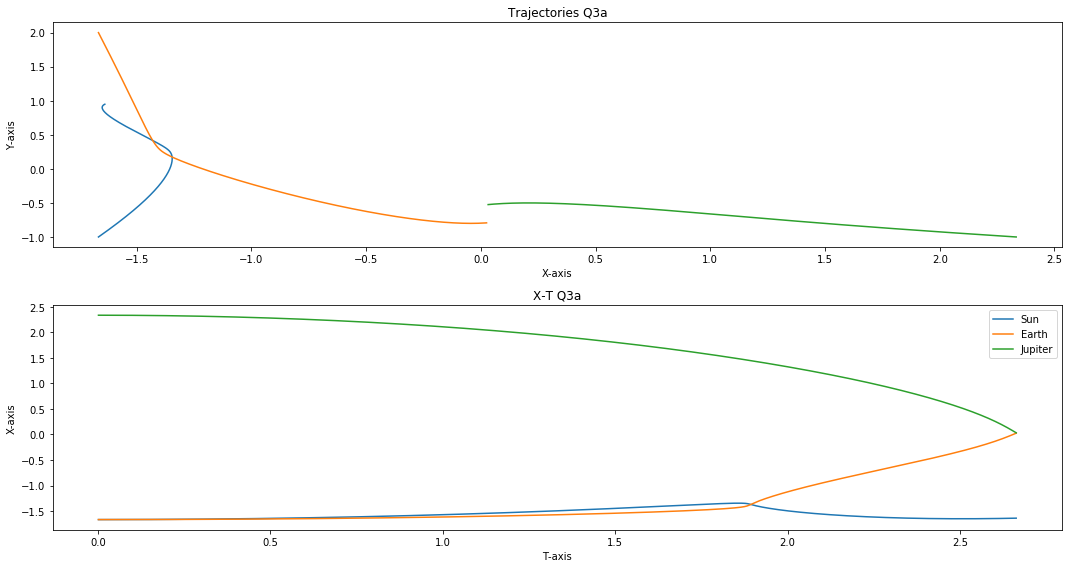

In [205]:
tiny = 1.e-20

def kdk_step(t, mass, pos, vel, eps2, dt):
    vel += .5*acceleration(mass, pos, eps2)*dt
    pos += vel*dt
    vel += .5*acceleration(mass, pos, eps2)*dt
    t += dt
    return t, pos, vel

def kick_drift_step(t, mass, pos, vel, eps2, dt):
    
    s = 4.0
    p = 2**(1/3)
    q = 1.0 - p
    r = 4.0 - 2*p
    
    c = [1/r, q/r, q/r, 1/r]
    d = [0, 2/r, -2*p/r, 2/r]
    
    a = acceleration(mass, pos, eps2)
    v = vel
    y = pos
    
    for i in range(len(c)):
    
        v += d[i]*a*dt
        y += c[i]*v*dt
        
    t += dt
    
    return t, pos, vel


def initialize_hw2(): #sun, earth, jupiter
    mass = np.array([5.0, 4.0, 3.0])
    pos = np.array([[0.,0.,0.], [0.,3.0,0.], [4.0,0.,0.]])
    vel = np.array([[0.,0.,0.], [0.,0.,0.], [0.,0.,0.]])
    
    M = mass.sum()


    rcm = (1/M)*(mass*pos).sum(axis = 0)
    vcm = (1/M)*(mass*vel).sum(axis = 0)  
    
    pos = pos - rcm
    vel = vel - vcm
    
    return mass,pos,vel

def main(N, seed, eps, dt, t_end, v0):
    
    # Initial conditions.

    t = 0.0
#     mass,pos,vel = initialize(N, seed, v0)


    mass,pos,vel = initialize_hw2()

    # Initial diagnostics.

    E0 = energy(mass, pos, vel, eps**2.)
    print('Initial E =', E0)
    output(t, E0, mass, pos, vel, eps**2.)
    a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
                                  vel[0], vel[1], eps**2)
    print('semimajor axis =', a, ' eccentricity =', e)

    # Run forward to specified time.

    tplot = []
    dEplot = []
    hplot = []
    smaplot = []
    eccplot = []

    x1plot = []
    y1plot = []

    x2plot = []
    y2plot = []

    x3plot = []
    y3plot = []

    emax = 0

    rp = 1.e6
    rpp = rp+1.
    posp = np.zeros(3)
    pospp = np.ones(3)
    while t < t_end-0.5*dt:
        t,pos,vel = kdk_step(t, mass, pos, vel, eps**2., dt)
        
    
        E = energy(mass, pos, vel, eps**2)
        a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0],
                                      pos[1], vel[0], vel[1], eps**2)
        r = (((pos[0]-pos[1])**2).sum())**0.5

        if e > emax:
            emax = e

        if r < rp and rp >= rpp:
            v1 = (rp-rpp)/dt
            v2 = (r-rp)/dt
            tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
            xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
#             print('maximum:  t =', tmax,
#                   'r =', (xmax**2).sum()**0.5,
#                   'angle =', math.atan2(xmax[1], xmax[0]) )

        if a < 0:
            print('unbound orbit')
            break

        tplot.append(t)
        dEplot.append(E-E0)
        hplot.append(h)
        smaplot.append(a)
        eccplot.append(e)

        x1plot.append(pos[0][0])
        y1plot.append(pos[0][1])

        x2plot.append(pos[1][0])
        y2plot.append(pos[1][1])

        x3plot.append(pos[2][0])
        y3plot.append(pos[2][1])

        rpp = rp
        rp = r
        pospp = posp.copy()
        posp = pos[0]-pos[1]

    # Final diagnostics.

    output(t, E0, mass, pos, vel, eps**2)

    plt.figure(figsize = (15, 8))

    if 1:
        plt.subplot(2, 1, 1)
        plt.plot(x1plot, y1plot, label = 'Sun')
        plt.plot(x2plot, y2plot, label = 'Earth')
        plt.plot(x3plot, y3plot, label = 'Jupiter')
        plt.title('Trajectories Q3a')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        
        plt.subplot(2,1,2)
        plt.plot(tplot, x1plot, label = 'Sun')
        plt.plot(tplot, x2plot, label = 'Earth')
        plt.plot(tplot, x3plot, label = 'Jupiter')
        plt.title('X-T Q3a')
        plt.xlabel('T-axis')
        plt.ylabel('X-axis')
        
    
    plt.tight_layout()
    plt.legend()
    plt.savefig('Question3a_graph.jpg')
    plt.show()

N = 3
seed = 42
eps = 0.1
dt = .001
t_end = 50
v0 = .25


main(N, seed, eps, dt, t_end, v0)

Initial E = -12.811314864510173
t = 0.0 dE = 0.0
semimajor axis = 1.5008331019803633  eccentricity = 1.0
unbound orbit
t = 2.6265000000000445 dE = 1.8987888299249889


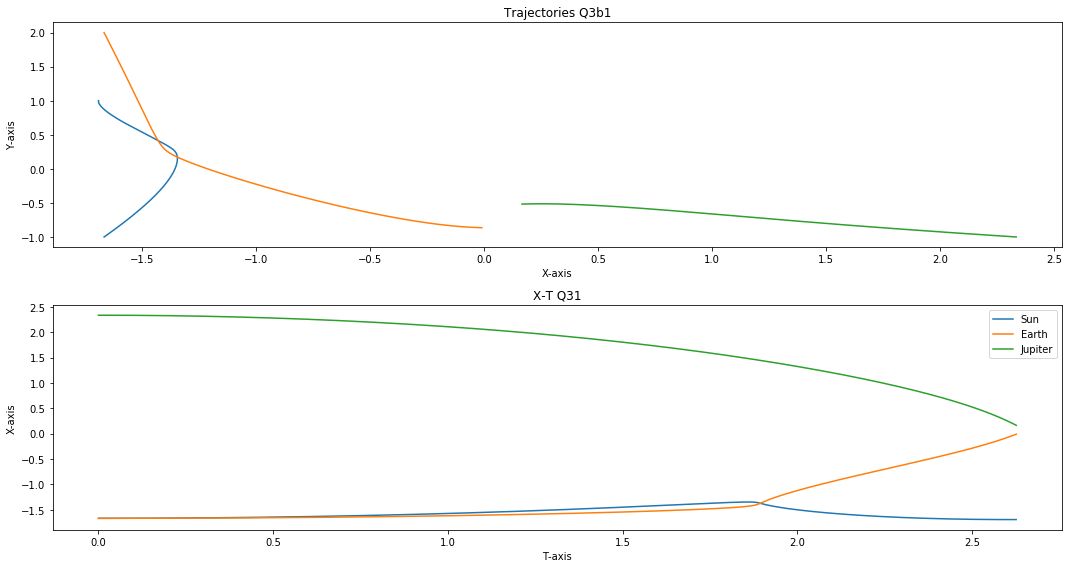

In [209]:
def main(N, seed, eps, dt, t_end, v0):
    
    # Initial conditions.

    t = 0.0
#     mass,pos,vel = initialize(N, seed, v0)


    mass,pos,vel = initialize_hw2()

    # Initial diagnostics.

    E0 = energy(mass, pos, vel, eps**2.)
    print('Initial E =', E0)
    output(t, E0, mass, pos, vel, eps**2.)
    a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
                                  vel[0], vel[1], eps**2)
    print('semimajor axis =', a, ' eccentricity =', e)

    # Run forward to specified time.

    tplot = []
    dEplot = []
    hplot = []
    smaplot = []
    eccplot = []

    x1plot = []
    y1plot = []

    x2plot = []
    y2plot = []

    x3plot = []
    y3plot = []

    emax = 0

    rp = 1.e6
    rpp = rp+1.
    posp = np.zeros(3)
    pospp = np.ones(3)
    while t < t_end-0.5*dt:
        t,pos,vel = kick_drift_step(t, mass, pos, vel, eps**2., dt)
        E = energy(mass, pos, vel, eps**2)
        a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0],
                                      pos[1], vel[0], vel[1], eps**2)
        r = (((pos[0]-pos[1])**2).sum())**0.5

        if e > emax:
            emax = e

        if r < rp and rp >= rpp:
            v1 = (rp-rpp)/dt
            v2 = (r-rp)/dt
            tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
            xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
#             print('maximum:  t =', tmax,
#                   'r =', (xmax**2).sum()**0.5,
#                   'angle =', math.atan2(xmax[1], xmax[0]) )

        if a < 0:
            print('unbound orbit')
            break

        tplot.append(t)
        dEplot.append(E-E0)
        hplot.append(h)
        smaplot.append(a)
        eccplot.append(e)

        x1plot.append(pos[0][0])
        y1plot.append(pos[0][1])

        x2plot.append(pos[1][0])
        y2plot.append(pos[1][1])

        x3plot.append(pos[2][0])
        y3plot.append(pos[2][1])

        rpp = rp
        rp = r
        pospp = posp.copy()
        posp = pos[0]-pos[1]

    # Final diagnostics.

    output(t, E0, mass, pos, vel, eps**2)

    plt.figure(figsize = (15, 8))

    if 1:
        plt.subplot(2, 1, 1)
        plt.plot(x1plot, y1plot, label = 'Sun')
        plt.plot(x2plot, y2plot, label = 'Earth')
        plt.plot(x3plot, y3plot, label = 'Jupiter')
        plt.title('Trajectories Q3b1')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        
        plt.subplot(2,1,2)
        plt.plot(tplot, x1plot, label = 'Sun')
        plt.plot(tplot, x2plot, label = 'Earth')
        plt.plot(tplot, x3plot, label = 'Jupiter')
        plt.title('X-T Q31')
        plt.xlabel('T-axis')
        plt.ylabel('X-axis')
        
        
    plt.legend()
    plt.tight_layout()
    plt.savefig('Question3b1_graph.jpg')
    plt.show()

N = 3
seed = 42
eps = 0.1
dt = .0005
t_end = 50
v0 = .25


main(N, seed, eps, dt, t_end, v0)

Initial E = -12.811314864510173
t = 0.0 dE = 0.0
semimajor axis = 1.5008331019803633  eccentricity = 1.0
unbound orbit
t = 1.8929999999999023 dE = 6.492260339065446


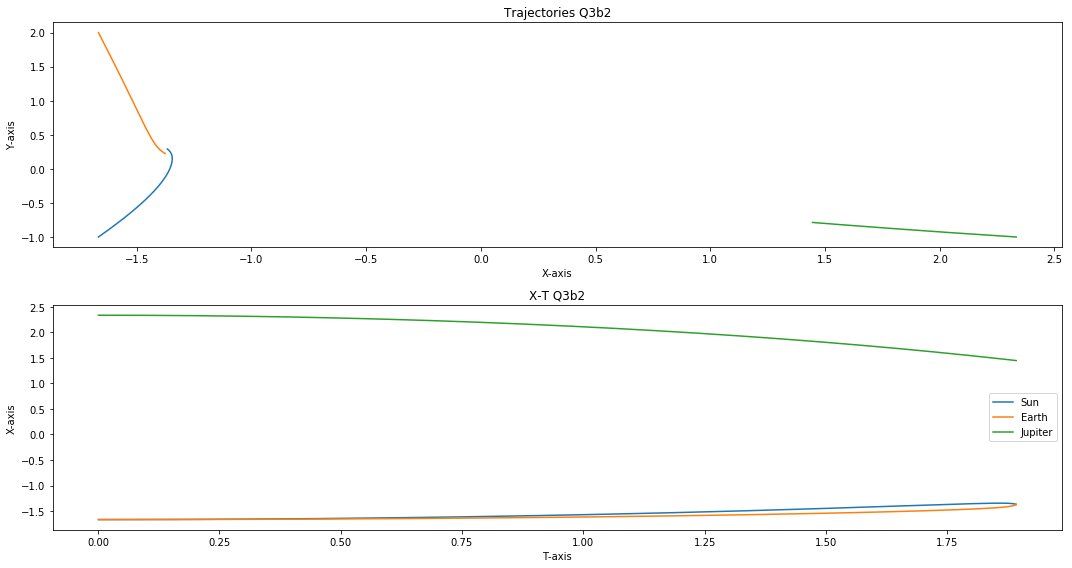

In [210]:
def main(N, seed, eps, dt, t_end, v0):
    
    # Initial conditions.

    t = 0.0
#     mass,pos,vel = initialize(N, seed, v0)


    mass,pos,vel = initialize_hw2()

    # Initial diagnostics.

    E0 = energy(mass, pos, vel, eps**2.)
    print('Initial E =', E0)
    output(t, E0, mass, pos, vel, eps**2.)
    a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
                                  vel[0], vel[1], eps**2)
    print('semimajor axis =', a, ' eccentricity =', e)

    # Run forward to specified time.

    tplot = []
    dEplot = []
    hplot = []
    smaplot = []
    eccplot = []

    x1plot = []
    y1plot = []

    x2plot = []
    y2plot = []

    x3plot = []
    y3plot = []

    emax = 0

    rp = 1.e6
    rpp = rp+1.
    posp = np.zeros(3)
    pospp = np.ones(3)
    while t < t_end-0.5*dt:
        t,pos,vel = kick_drift_step(t, mass, pos, vel, eps**2., dt)
        E = energy(mass, pos, vel, eps**2)
        a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0],
                                      pos[1], vel[0], vel[1], eps**2)
        r = (((pos[0]-pos[1])**2).sum())**0.5

        if e > emax:
            emax = e

        if r < rp and rp >= rpp:
            v1 = (rp-rpp)/dt
            v2 = (r-rp)/dt
            tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
            xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
#             print('maximum:  t =', tmax,
#                   'r =', (xmax**2).sum()**0.5,
#                   'angle =', math.atan2(xmax[1], xmax[0]) )

        if a < 0:
            print('unbound orbit')
            break

        tplot.append(t)
        dEplot.append(E-E0)
        hplot.append(h)
        smaplot.append(a)
        eccplot.append(e)

        x1plot.append(pos[0][0])
        y1plot.append(pos[0][1])

        x2plot.append(pos[1][0])
        y2plot.append(pos[1][1])

        x3plot.append(pos[2][0])
        y3plot.append(pos[2][1])

        rpp = rp
        rp = r
        pospp = posp.copy()
        posp = pos[0]-pos[1]

    # Final diagnostics.

    output(t, E0, mass, pos, vel, eps**2)

    plt.figure(figsize = (15, 8))

    if 1:
        plt.subplot(2, 1, 1)
        plt.plot(x1plot, y1plot, label = 'Sun')
        plt.plot(x2plot, y2plot, label = 'Earth')
        plt.plot(x3plot, y3plot, label = 'Jupiter')
        plt.title('Trajectories Q3b2')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        
        plt.subplot(2,1,2)
        plt.plot(tplot, x1plot, label = 'Sun')
        plt.plot(tplot, x2plot, label = 'Earth')
        plt.plot(tplot, x3plot, label = 'Jupiter')
        plt.title('X-T Q3b2')
        plt.xlabel('T-axis')
        plt.ylabel('X-axis')
        
        
    plt.legend()
    plt.tight_layout()
    plt.savefig('Question3b2_graph.jpg')
    plt.show()

N = 3
seed = 42
eps = 0.1
dt = .001
t_end = 50
v0 = .25


main(N, seed, eps, dt, t_end, v0)

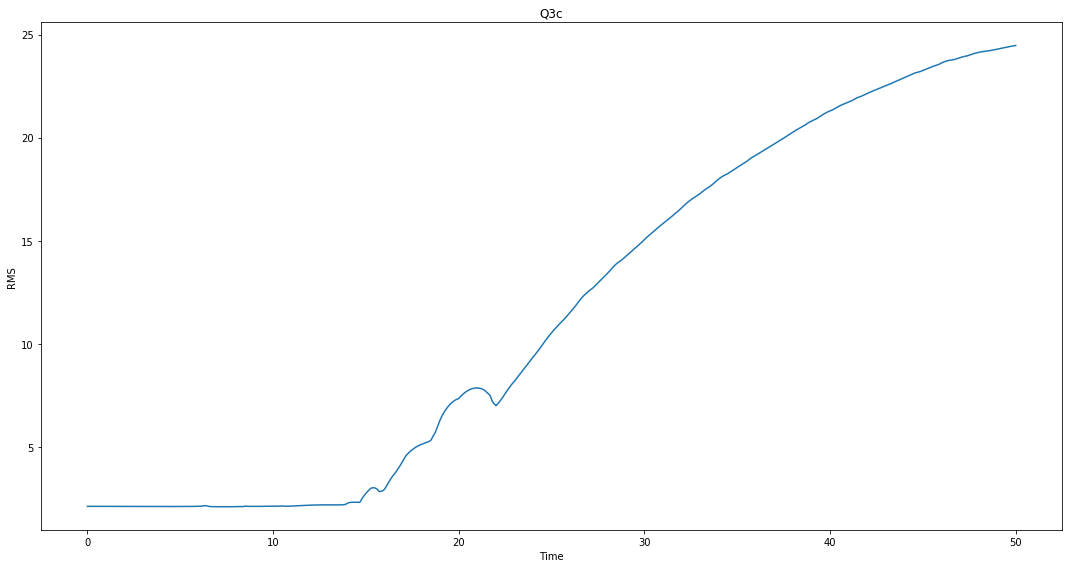

In [180]:
def initialize_hw3(): #sun, earth, jupiter
    mass = np.array([5.0, 4.0, 3.0])
    pos = np.array([[0.,0.,0.], [0.,3.0,0.], [4.0,0.05,0.]])
    vel = np.array([[0.,0.,0.], [0.,0.,0.], [0.,0.,0.]])
    
    return mass,pos,vel

def main(N, seed, eps, dt, t_end, v0):
    
    # Initial conditions.

    t1 = 0.0
    t2 = 0.0
#     mass,pos,vel = initialize(N, seed, v0)


    mass1,pos1,vel1 = initialize_hw2()
    mass2,pos2,vel2 = initialize_hw3()
    # Initial diagnostics.

#     E0 = energy(mass, pos, vel, eps**2.)
#     print('Initial E =', E0)
#     output(t, E0, mass, pos, vel, eps**2.)
#     a,e,Erel,h = orbital_elements(mass[0], mass[1], pos[0], pos[1],
#                                   vel[0], vel[1], eps**2)
#     print('semimajor axis =', a, ' eccentricity =', e)

    # Run forward to specified time.

#     tplot = []
#     dEplot = []
#     hplot = []
#     smaplot = []
#     eccplot = []

#     x1plot = []
#     y1plot = []

#     x2plot = []
#     y2plot = []

#     x3plot = []
#     y3plot = []
    Dplot = []
    tplot = []

    emax = 0
    rp = 1.e6
#     rpp = rp+1.
#     posp = np.zeros(3)
#     pospp = np.ones(3)
    while t1 < t_end-0.5*dt:
        
        t1,pos1,vel1 = kdk_step(t1, mass1, pos1, vel1, eps**2, dt)
        t2,pos2,vel2 = kdk_step(t2, mass2, pos2, vel2 ,eps**2, dt)
        
        M = mass1.sum()
        D = np.sqrt((1/M)*(np.power(pos2 - pos1, 2)*mass1).sum())

        
        Dplot.append(D)
        
# #         E = energy(mass, pos, vel, eps**2)
#         a1,e1,Erel1,h1 = orbital_elements(mass1[0], mass1[1], pos1[0],
#                                       pos1[1], vel1[0], vel1[1], eps**2)

#         r = (((pos[0]-pos[1])**2).sum())**0.5

#         if e > emax:
#             emax = e

#         if r < rp and rp >= rpp:
#             v1 = (rp-rpp)/dt
#             v2 = (r-rp)/dt
#             tmax = t - 1.5*dt + dt*(-v1)/(v2-v1)
#             xmax = 0.5*(pospp+posp) + 0.5*(pos[0]-pos[1]-pospp)*(-v1)/(v2-v1)
#             print('maximum:  t =', tmax,
#                   'r =', (xmax**2).sum()**0.5,
#                   'angle =', math.atan2(xmax[1], xmax[0]) )

#         if a < 0:
#             print('unbound orbit')
#             break
            
        

        tplot.append(t1)
#         dEplot.append(E-E0)
#         hplot.append(h)
#         smaplot.append(a)
#         eccplot.append(e)

#         x1plot.append(pos[0][0])
#         y1plot.append(pos[0][1])

#         x2plot.append(pos[1][0])
#         y2plot.append(pos[1][1])

#         x3plot.append(pos[2][0])
#         y3plot.append(pos[2][1])

#         rpp = rp
#         rp = r
#         pospp = posp.copy()
#         posp = pos[0]-pos[1]

#     # Final diagnostics.

#     output(t, E0, mass, pos, vel, eps**2)

    plt.figure(figsize = (15, 8))

    plt.plot(tplot, Dplot)
    plt.xlabel('Time')
    plt.ylabel('RMS')
    plt.title('Q3c')
    plt.savefig('Question3c.jpg')
#         plt.subplot(2, 1, 1)
#         plt.plot(x1plot, y1plot)
#         plt.plot(x2plot, y2plot)
#         plt.plot(x3plot, y3plot)
        
#         plt.subplot(2,1,2)
#         plt.plot(tplot, x1plot)
#         plt.plot(tplot, x2plot)
#         plt.plot(tplot, x3plot)
        
        
   
    plt.tight_layout()
    plt.show()

N = 3
seed = 42
eps = 0.1
dt = .001
t_end = 50
v0 = .25

main(N, seed, eps, dt, t_end, v0)

In [125]:
a = np.array([1,2,3])
b = np.array([4,5,6])
m = np.array([2,2,2])

In [128]:
np.sqrt((np.power(a-b, 2)*m).sum())


7.3484692283495345

In [146]:
mass = np.array([5.0, 4.0, 3.0])
pos = np.array([[1.,0.,0.], [0.,3.0,0.], [4.0,0.,0.]])

In [152]:
cm = (mass*pos).sum(axis = 0)
cm

array([25., 12.,  0.])

In [151]:
pos - cm

array([[-24., -12.,   0.],
       [-25.,  -9.,   0.],
       [-21., -12.,   0.]])

In [212]:
if 1:
    print('hi')

hi
